In [2]:
!pip install language-tool-python

In [3]:
!pip install skll

     |████████████████████████████████| 125 kB 4.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.7 MB/s 
     |████████████████████████████████| 109 kB 51.1 MB/s 
     |████████████████████████████████| 546 kB 31.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install https://github.com/medianeuroscience/emfdscore/archive/master.zip

     - 6.5 MB 442 kB/s
  Created wheel for emfdscore: filename=emfdscore-0.0.1-py3-none-any.whl size=1499099 sha256=1ab8c82209a4b1476fd4631ba989d363288101cad3b98fd2ac0bf383e0c2dbb2
  Stored in directory: /tmp/pip-ephem-wheel-cache-_1hs4imv/wheels/55/6c/e0/0500335bd03b5ec5a1719604ac26dfa4d2652f8e5386612201
Successfully built emfdscore


In [5]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install git+https://github.com/medianeuroscience/emfdscore.git

     |████████████████████████████████| 1.6 MB 5.3 MB/s 
     |████████████████████████████████| 816 kB 44.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 5.8 MB 4.0 MB/s 
     |████████████████████████████████| 623 kB 65.4 MB/s 
     |████████████████████████████████| 456 kB 58.4 MB/s 
     |████████████████████████████████| 10.1 MB 35.8 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 13.6 MB 72 kB/s 
  Attempting uninstall: en-core-web-sm
    Foun

In [6]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.2-py3-none-any.whl size=5428 sha256=0d3c65b61fd456f791cc2837bf282ea79235b3cc8a9da177cdde5420a32c9c6a
  Stored in directory: /root/.cache/pip/wheels/e4/97/87/d3ea94b8e2705012cb72752ef5d6cd85b5064c6700a90f780d
Successfully built ml-metrics


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, KFold

from gensim.models.word2vec import Word2Vec
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords

from nltk.corpus import stopwords
import language_tool_python
import spacy

from sklearn.model_selection import train_test_split, KFold

from skll.metrics import kappa
# from bhkappa import mean_quadratic_weighted_kappa

from scipy.sparse import csr_matrix

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Bidirectional, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasRegressor

nlp = spacy.load("en_core_web_sm")

# stopwords = stopwords.words('english')
stop_words = set(stopwords.words('english'))

%matplotlib inline

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Numpy version: 1.19.5
Pandas version: 1.1.5
Seaborn version: 0.11.2


## Exploratory Data Analysis

In [9]:
def correct_language(df):
  tool = language_tool_python.LanguageTool('en-US')

  df['matches'] = df['essay'].apply(lambda txt: tool.check(txt))
  df['corrections'] = df.apply(lambda l: len(l['matches']), axis=1)
  df['corrected'] = df.apply(lambda l: language_tool_python.utils.correct(l['essay'],l['matches']),axis=1)

  return df

In [31]:
training_set = pd.read_csv('train.csv',sep=',',encoding="ISO-8859-1")
training_set.drop(['Unnamed: 0'],axis=1,inplace=True)

training_set = correct_language(training_set)
training_set.head()

promptId  ...                                          corrected
0         1  ...  At present age, our education system is not go...
1         1  ...  I am agree the tightly defined curriculum of o...
2         1  ...  I strongly agree with the statement that tight...
3         1  ...  Our education system is nice quietly but I dis...
4         1  ...  I am totally agreed with the statement that ti...

[5 rows x 7 columns]

In [103]:
len(training_set)

1240

In [32]:
training_set["promptId"].replace({5:4}, inplace=True)
training_set.head(-5)

promptId  ...                                          corrected
0            1  ...  At present age, our education system is not go...
1            1  ...  I am agree the tightly defined curriculum of o...
2            1  ...  I strongly agree with the statement that tight...
3            1  ...  Our education system is nice quietly but I dis...
4            1  ...  I am totally agreed with the statement that ti...
...        ...  ...                                                ...
1230         4  ...  God has blessed man with a brain, with the hel...
1231         4  ...  Our planet earth is a place for each and every...
1232         4  ...  In TH earth we are having many things to know ...
1233         4  ...  In my point of view races should damage the wo...
1234         4  ...  Production of arms and weapons in the area of ...

[1235 rows x 7 columns]

In [105]:
training_set.to_pickle('training_features_corrected.pkl')

In [33]:
testing_set = pd.read_csv('test.csv',sep=',',encoding="ISO-8859-1")
testing_set.drop(['Unnamed: 0'],axis=1,inplace=True)
training_set["promptId"].replace({5:4}, inplace=True)

testing_set = correct_language(testing_set)
testing_set.head()

promptId  ...                                          corrected
0         1  ...  Curriculum has been adopted in many schools. T...
1         1  ...  I strongly agree with the statement, The tight...
2         1  ...  Imagination and creativity is the most importa...
3         1  ...  In our education system leaves no room for ima...
4         1  ...  I will agree at somewhat extend, because if we...

[5 rows x 6 columns]

In [107]:
testing_set.to_pickle('testing_features_corrected.pkl')

In [34]:
combo_set = pd.concat([training_set, testing_set], sort=False)
combo_set.head(-5)

promptId  ...                                          corrected
0           1  ...  At present age, our education system is not go...
1           1  ...  I am agree the tightly defined curriculum of o...
2           1  ...  I strongly agree with the statement that tight...
3           1  ...  Our education system is nice quietly but I dis...
4           1  ...  I am totally agreed with the statement that ti...
..        ...  ...                                                ...
295         5  ...  In modern world, the production of arms and we...
296         5  ...  RACE IN THE PRODUCTION OF ARMS AND WEAPONS IN ...
297         5  ...  Nowadays nuclear weapons and arms are the most...
298         5  ...  Nowadays the Countries are emerging with more ...
299         5  ...  The race in the production of arms and weapons...

[1540 rows x 7 columns]

In [109]:
combo_set.to_pickle('combo_set.pkl')
len(combo_set)

1545

In [10]:
punctuations = string.punctuation

def cleanup(essays, logging=False):
  texts = []
  counter = 1

  for essay in essays.corrected:
    if counter % 200 == 0 and logging:
      print("Processed %d out of %d documents." %(counter, len(essays)))
    counter += 1
    essay = nlp(essay, disable=['parser','ner'])

    tokens = [tok.lemma_.lower().strip() for tok in essay if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stop_words and tok not in punctuations]
    tokens = ' '.join(tokens)

    texts.append(tokens)
  return pd.Series(texts)

In [35]:
print('Original training data shape', training_set['corrected'].shape)

train_data_cleaned = cleanup(training_set, logging=True)
print('Cleaned training data shape', train_data_cleaned.shape)

Original training data shape (1240,)
Processed 200 out of 1240 documents.
Processed 400 out of 1240 documents.
Processed 600 out of 1240 documents.
Processed 800 out of 1240 documents.
Processed 1000 out of 1240 documents.
Processed 1200 out of 1240 documents.
Cleaned training data shape (1240,)


In [11]:
def essay_word2vec(essays, logging=False):
  sentences = []
  counter = 1

  for essay in essays:
    if counter % 200 == 0 and logging:
      print("Processed %d out of %d documents." %(counter, len(essays)))
    essay = nlp(essay, disable=['tagger'])
    essay = " ".join([tok.lemma_.lower() for tok in essay])
    essay = re.split("[\.?!;] ",essay)
    essay = [re.sub("[\.,;:!?]", "", sent) for sent in essay]

    essay = [sent.split() for sent in essay]
    sentences += essay
    counter += 1
  return sentences

In [36]:
cleaned_word2vec = essay_word2vec(combo_set['corrected'], logging=True)
print('Cleaned up training data size: ',len(cleaned_word2vec))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'friendly'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'atmosphere'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'faster'. Check that your pipeline includes components that assign token.pos, typically 

Processed 200 out of 1545 documents.


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'DPO'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'popular'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'beliefs'. Check that your pipeline includes components that assign token.pos, typically 'tagger

Processed 400 out of 1545 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'problems.-'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Dalai'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Lama'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warning

Processed 600 out of 1545 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'TECHNOLOGY'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'ADDICTION'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'today'topic'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'

Processed 800 out of 1545 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'adequately'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Survival'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'window'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  wa

Processed 1000 out of 1545 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'dint'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Certainly'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'bloodshed'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warn

Processed 1200 out of 1545 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'WANTS'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'WORLDNowadays'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Wrold'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  war

Processed 1400 out of 1545 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token '2G,3G,4'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token '1second'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'hires'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warning

Cleaned up training data size:  23345


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'tags'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'it"Peace'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Harmony'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warning

In [114]:
len(cleaned_word2vec)

23345

In [37]:
text_dim = 300

print("Training word2vec model...")
wordvec_model = Word2Vec(cleaned_word2vec, size=text_dim, window=5, min_count=3, workers=4, sg=1)

print("Model created.")
print("%d unique words represented by %d dimensional vectors" %(len(wordvec_model.wv.vocab), text_dim))
wordvec_model.save('wordvec_model')

print("Model saved")

Training word2vec model...
Model created.
5274 unique words represented by 300 dimensional vectors
Model saved


In [12]:
def create_avg_vec(essay):
  average = np.zeros((text_dim), dtype='float32')
  num_words = 0
  for word in essay.split():
    if word in wordvec_model.wv.vocab:
      average = np.add(average, wordvec_model.wv[word])
      num_words += 1.
  if num_words != 0.:
    average = np.divide(average, num_words)
  return average

In [38]:
cleaned_vec = np.zeros((training_set.shape[0], text_dim), dtype="float32")  
for i in range(len(train_data_cleaned)):
    cleaned_vec[i] = create_avg_vec(train_data_cleaned[i])

print("Word vectors for all essays in the training data set are of shape:", cleaned_vec.shape)

Word vectors for all essays in the training data set are of shape: (1240, 300)


In [118]:
train_data_cleaned.head(5)

0    present age education system good many thing r...
1    agree tightly define curriculum education syst...
2    strongly agree statement tight schedule educat...
3    education system nice quietly disagree change ...
4    totally agree statement tightly define curricu...
dtype: object

In [119]:
cleaned_word2vec[0],cleaned_word2vec[1]

(['at',
  'present',
  'age',
  'our',
  'education',
  'system',
  'is',
  'not',
  'good',
  'because',
  'so',
  'many',
  'things',
  'are',
  'done',
  'which',
  'is',
  'not',
  'required'],
 ['education',
  'systems',
  'not',
  'work',
  'properly',
  'for',
  'so',
  'many',
  'regions',
  'in',
  'present',
  'time',
  'like',
  'corruption',
  'etc'])

## CREATING NEURAL NETWORK

### Method 1

In [42]:
np.seterr(divide='ignore', invalid='ignore')

# additional_features = pd.read_pickle('training_features_corrected.pkl')
additional_features = training_set

feature_list = ['word_count',
                'corrections',
                'similarity',
                'token_count',
                'unique_token_count',
                'nostop_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'organization',
                'caps',
                'person',
                'location',
                'money',
                'time',
                'date',
                'percent',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'det',
                'propn',
                'num',
                'part',
                'intj'
                ]

# columns = [	"Unnamed: 0",	"promptId"	,"uniqueId"	,"essay",	"evaluator_rating",	"matches"	,"corrections"	,"corrected"]
# additional_features = additional_features.reindex(columns=columns)

# feature_list = feature_list.reindex(columns=feature_list)
additional_features = additional_features.reindex(columns=feature_list)
additional_features = additional_features[feature_list]

stdscaler = StandardScaler()
additional_features = stdscaler.fit_transform(additional_features)
additional_features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[        nan, -0.8486708 ,         nan, ...,         nan,
                nan,         nan],
       [        nan,  0.22008961,         nan, ...,         nan,
                nan,         nan],
       [        nan, -1.03727557,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, -0.78580254,         nan, ...,         nan,
                nan,         nan],
       [        nan,  1.41458653,         nan, ...,         nan,
                nan,         nan],
       [        nan, -0.03138343,         nan, ...,         nan,
                nan,         nan]])

In [43]:
# all_data = pd.concat([training_set[['promptId', 'evaluator_rating']], pd.DataFrame(additional_features),pd.DataFrame(cleaned_vec)],axis=1)
all_data = pd.concat([training_set[['promptId', 'evaluator_rating']], pd.DataFrame(cleaned_vec)],axis=1)
all_data.shape

(1240, 302)

In [122]:
all_data.head(-5)

promptId  evaluator_rating         0  ...       297       298       299
0            1               3.0  0.096266  ... -0.151895  0.205011 -0.125052
1            1               4.0  0.050511  ... -0.149970  0.229833 -0.155570
2            1               2.0  0.049061  ... -0.182233  0.208462 -0.145510
3            1               2.0  0.083828  ... -0.161865  0.227642 -0.140695
4            1               3.0  0.072442  ... -0.157945  0.235750 -0.106967
...        ...               ...       ...  ...       ...       ...       ...
1230         4               3.5  0.081432  ... -0.135373  0.122574 -0.277282
1231         4               3.0  0.056481  ... -0.175795  0.114458 -0.264281
1232         4               1.5  0.081690  ... -0.151712  0.123038 -0.197287
1233         4               1.5  0.060159  ... -0.121129  0.153284 -0.240051
1234         4               1.5  0.069692  ... -0.151180  0.131745 -0.258551

[1235 rows x 302 columns]

In [123]:
output_dim = 1
input_dim = all_data.shape[1] - 2
dropout = 0.2

model = None
model = Sequential()

model.add(Dense(14, activation='relu', kernel_initializer='he_normal', input_dim=input_dim))
model.add(Dropout(dropout))

# model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(dropout))

# model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(dropout))

# model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(dropout))
 
# model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(dropout))

model.add(Dense(output_dim))

model.summary()

adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mse', metrics=['mse','mae'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 14)                4214      
_________________________________________________________________
dropout_24 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 15        
Total params: 4,229
Trainable params: 4,229
Non-trainable params: 0
_________________________________________________________________


In [124]:
predictions = pd.DataFrame()

In [125]:
testing_set.head()

promptId  ...                                          corrected
0         1  ...  Curriculum has been adopted in many schools. T...
1         1  ...  I strongly agree with the statement, The tight...
2         1  ...  Imagination and creativity is the most importa...
3         1  ...  In our education system leaves no room for ima...
4         1  ...  I will agree at somewhat extend, because if we...

[5 rows x 6 columns]

In [39]:
def mean_quadratic_weighted_kappa(kappas, weights=None):
    """
    Calculates the mean of the quadratic
    weighted kappas after applying Fisher's r-to-z transform, which is
    approximately a variance-stabilizing transformation.  This
    transformation is undefined if one of the kappas is 1.0, so all kappa
    values are capped in the range (-0.999, 0.999).  The reverse
    transformation is then applied before returning the result.
    mean_quadratic_weighted_kappa(kappas), where kappas is a vector of
    kappa values
    mean_quadratic_weighted_kappa(kappas, weights), where weights is a vector
    of weights that is the same size as kappas.  Weights are applied in the
    z-space
    """
    kappas = np.array(kappas, dtype=float)
    if weights is None:
        weights = np.ones(np.shape(kappas))
    else:
        weights = weights / np.mean(weights)

    # ensure that kappas are in the range [-.999, .999]
    kappas = np.array([min(x, .999) for x in kappas])
    kappas = np.array([max(x, -.999) for x in kappas])

    z = 0.5 * np.log((1 + kappas) / (1 - kappas)) * weights
    z = np.mean(z)
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

In [151]:
kappa_list = []
weights = []
epochs = 100
models = []

# predictions = pd.DataFrame()

for topic in range(1,4):
  print("Model 1: ")
  X = all_data[all_data.promptId == topic].drop(['promptId', 'evaluator_rating'], axis=1)
  y = all_data[all_data.promptId == topic].evaluator_rating.to_frame()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
  estimator = model.fit(X_train, y_train, epochs=epochs, batch_size=15, verbose=1)
  # models.append(estimator)

  y_pred = pd.DataFrame(model.predict(X_test).reshape(-1))
  # predictions = pd.concat([predictions, y_pred], axis=1)
  kappa_list.append(kappa(y_test.values, y_pred.round(0).astype(int).values, weights='quadratic'))

  weights.append(y_test.shape[0]/all_data.shape[0])

qwk = mean_quadratic_weighted_kappa(kappa_list, weights=1)
print('Combined Kappa score: {:.2f}%'.format(qwk*100))

Model 1: 
Epoch 1/100
15/15 [==============================] - 0s 4ms/step - loss: 1.4006 - mse: 1.4006 - mae: 0.9099
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.4375 - mse: 1.4375 - mae: 0.9358
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.3030 - mse: 1.3030 - mae: 0.8787
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.4713 - mse: 1.4713 - mae: 0.9232
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 1.4331 - mse: 1.4331 - mae: 0.9365
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 1.3329 - mse: 1.3329 - mae: 0.9007
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 1.4582 - mse: 1.4582 - mae: 0.9477
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 1.5277 - mse: 1.5277 - mae: 0.9869
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 1.3723 - mse: 1.3723 - mae: 0.9002
Epoch 10/100
15/15

In [152]:
kappa_dict = {}

for topic in range(1,4):
  model = None

  model = Sequential()
  model.add(Dense(14, input_dim=input_dim, kernel_initializer='he_normal', activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam')

  X = all_data[all_data.promptId == topic].drop(['promptId', 'evaluator_rating'],axis=1)
  y = all_data[all_data.promptId == topic].evaluator_rating.to_frame()

  kf = KFold(n_splits=5, random_state=26, shuffle=True)
  kappa_list = []
  for train, test in kf.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    model.fit(X_train, y_train, epochs=200, batch_size=15, verbose=0)

    y_pred = pd.DataFrame(model.predict(X_test).reshape(-1))
    kappa_list.append(kappa(y_pred.round(0).astype(int).values, y.iloc[test].values, weights='quadratic'))

  print("Kappa for topic: ", topic, " : {:.3f}%".format(np.mean(kappa_list)))
  kappa_dict[topic] = np.mean(kappa_list)

mqwk = mean_quadratic_weighted_kappa(list(kappa_dict.values()), weights=1)
print('Combined Kappa score: {:.4f}%'.format(mqwk))

Kappa for topic:  1  : 0.418%
Kappa for topic:  2  : 0.254%
Kappa for topic:  3  : 0.157%
Combined Kappa score: 0.2800%


In [129]:
kappa_list

[0.0404592673592129,
 0.09999999999999998,
 0.17302798982188305,
 0.15040727410494403,
 0.17689460354568476]

### Method 2

In [169]:
scores = all_data[['promptId', 'evaluator_rating']].reset_index()

scaler = MinMaxScaler((0,5))

In [170]:
len(scores)

1240

In [171]:
# scaled = []
# for topic in range(1,4):
#   topic_scores = scores[scores['promptId'] == topic]['evaluator_rating'].to_frame()
#   s = (scaler.fit_transform(topic_scores).reshape(-1))
#   scaled = np.append(scaled, s)
# 
# scores['scaled'] = scaled

y = scores['evaluator_rating'].to_frame()
X = all_data.drop(['promptId', 'evaluator_rating'], axis=1)

In [172]:
y.head(-5)

evaluator_rating
0                  3.0
1                  4.0
2                  2.0
3                  2.0
4                  3.0
...                ...
1230               3.5
1231               3.0
1232               1.5
1233               1.5
1234               1.5

[1235 rows x 1 columns]

In [173]:
X.head(-5)

0         1         2    ...       297       298       299
0     0.096266 -0.240496  0.139370  ... -0.151895  0.205011 -0.125052
1     0.050511 -0.228092  0.120573  ... -0.149970  0.229833 -0.155570
2     0.049061 -0.272382  0.165939  ... -0.182233  0.208462 -0.145510
3     0.083828 -0.213319  0.117709  ... -0.161865  0.227642 -0.140695
4     0.072442 -0.260847  0.139642  ... -0.157945  0.235750 -0.106967
...        ...       ...       ...  ...       ...       ...       ...
1230  0.081432 -0.212512  0.083795  ... -0.135373  0.122574 -0.277282
1231  0.056481 -0.290935  0.076935  ... -0.175795  0.114458 -0.264281
1232  0.081690 -0.212454  0.129013  ... -0.151712  0.123038 -0.197287
1233  0.060159 -0.215800  0.126874  ... -0.121129  0.153284 -0.240051
1234  0.069692 -0.218792  0.098578  ... -0.151180  0.131745 -0.258551

[1235 rows x 300 columns]

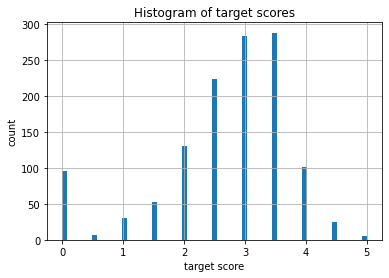

In [174]:
y.hist(bins=61)
plt.title('Histogram of target scores')
plt.xlabel('target score')
plt.ylabel('count')
plt.savefig('image1.png', dpi=300)
plt.show()

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, scores_train, scores_test = \
        train_test_split(
                X, 
                y, 
                scores,
                test_size=0.2, 
                random_state=26
                )

print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))
print('scores_train size: {}'.format(scores_train.shape))
print('scores_test size: {}'.format(scores_test.shape))

X_train size: (992, 300)
X_test size: (248, 300)
y_train size: (992, 1)
y_test size: (248, 1)
scores_train size: (992, 3)
scores_test size: (248, 3)


In [176]:
output_dim = y.shape[1]
input_dim = X.shape[1]
dropout = 0.2

def build_model(architecture='mlp'):
    model = Sequential()
    if architecture == 'mlp':
        model.add(Dense(14, activation='relu', kernel_initializer='he_normal', input_dim=input_dim)) 
        model.add(Dropout(dropout))


        model.add(Dense(output_dim))
    elif architecture == 'cnn':
        # 1-D Convolutional Neural Network
        inputs = Input(shape=(input_dim,1))

        x = Conv1D(64, 3, strides=1, padding='same', activation='relu')(inputs)

        #Cuts the size of the output in half, maxing over every 2 inputs
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(128, 3, strides=1, padding='same', activation='relu')(x)
        x = GlobalMaxPooling1D()(x) 
        outputs = Dense(output_dim, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='CNN')
    elif architecture == 'lstm':
        # LSTM network
        inputs = Input(shape=(input_dim,1))

        x = Bidirectional(LSTM(64, return_sequences=True),
                          merge_mode='concat')(inputs)
        x = Dropout(dropout)(x)
        x = Flatten()(x)
        outputs = Dense(output_dim, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='LSTM')
    else:
        print('Error: Model type not found.')
    return model

In [177]:
model = None

model = build_model('mlp')
# model = build_model('cnn')
# model = build_model('lstm')

# If the model is a CNN/LSTM then expand the dimensions of the training data
if model.name == "CNN" or model.name == "LSTM":
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    print('Text train shape: ', X_train.shape)
    print('Text test shape: ', X_test.shape)
    
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 14)                4214      
_________________________________________________________________
dropout_33 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 15        
Total params: 4,229
Trainable params: 4,229
Non-trainable params: 0
_________________________________________________________________


In [178]:
# sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=adam, loss='mse', metrics=['mse','mae'])

In [179]:
epochs = 100
estimator = model.fit(X_train, y_train, epochs=epochs, batch_size=15, verbose=1)

Epoch 1/150
67/67 [==============================] - 1s 3ms/step - loss: 8.1110 - mse: 8.1110 - mae: 2.6455
Epoch 2/150
67/67 [==============================] - 0s 3ms/step - loss: 6.8886 - mse: 6.8886 - mae: 2.4361
Epoch 3/150
67/67 [==============================] - 0s 3ms/step - loss: 5.9143 - mse: 5.9143 - mae: 2.2534
Epoch 4/150
67/67 [==============================] - 0s 4ms/step - loss: 5.0037 - mse: 5.0037 - mae: 2.0620
Epoch 5/150
67/67 [==============================] - 0s 4ms/step - loss: 4.2160 - mse: 4.2160 - mae: 1.8860
Epoch 6/150
67/67 [==============================] - 0s 4ms/step - loss: 3.5733 - mse: 3.5733 - mae: 1.7189
Epoch 7/150
67/67 [==============================] - 0s 3ms/step - loss: 3.0016 - mse: 3.0016 - mae: 1.5623
Epoch 8/150
67/67 [==============================] - 0s 3ms/step - loss: 2.5185 - mse: 2.5185 - mae: 1.4000
Epoch 9/150
67/67 [==============================] - 0s 3ms/step - loss: 2.1683 - mse: 2.1683 - mae: 1.2804
Epoch 10/150
67/67 [========

In [180]:
y_pred = pd.DataFrame(model.predict(X_test).reshape(-1))
results = scores_test.reset_index(drop=True).join(y_pred).rename(columns={0:'y_pred'}).sort_values(by='promptId')
results.head(10)

index  promptId  evaluator_rating    y_pred
0        4         1               3.0  2.789970
219     57         1               2.0  2.610822
48      50         1               1.0  2.349648
217    104         1               2.5  2.759273
209     40         1               3.5  2.802159
56      44         1               2.0  2.817230
72     233         1               4.5  2.813184
75      17         1               2.0  2.926104
79     105         1               5.0  2.803273
80     262         1               3.0  2.844419

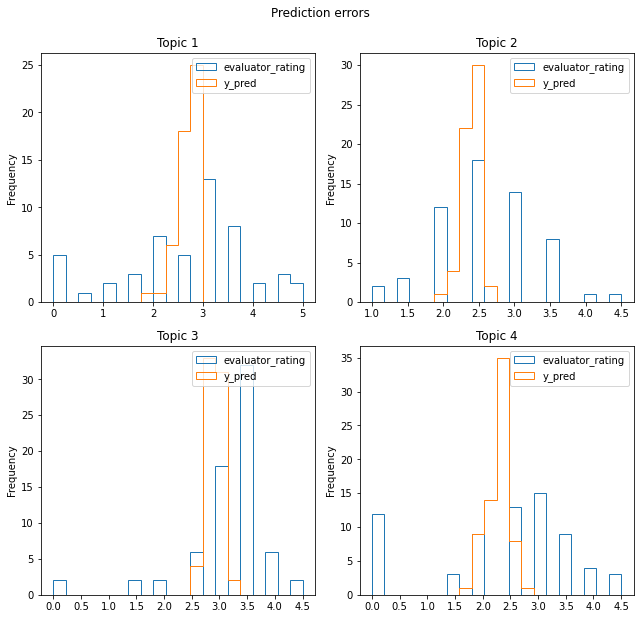

In [181]:
topic_number = 0
fig, ax = plt.subplots(2,2, figsize=(9,9), sharey=False)
for i in range(2):
    for j in range(2):
        topic_number += 1
        results[results['promptId'] == topic_number]\
            [['evaluator_rating', 'y_pred']]\
            .plot.hist(histtype='step', bins=20, ax=ax[i, j], rot=0)
        ax[i,j].set_title('Topic %i' % topic_number)
ax[1,0].locator_params(nbins=10)
ax[1,1].locator_params(nbins=10)
plt.suptitle('Prediction errors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [182]:
k = kappa(results.y_pred, results.evaluator_rating, weights='quadratic')
print('Combined essay kappa score: {:.4f}'.format(k))

Combined essay kappa score: 0.2004


In [183]:
qwk = []
# weights = []
for topic in range(1,4):
    qwk.append(
            kappa(results[results.promptId == topic]['evaluator_rating'], 
                  results[results.promptId == topic]['y_pred'],
                    weights='quadratic'))
#     weights.append(len(results[results.topic==topic])/X_test.shape[0])    
mqwk = mean_quadratic_weighted_kappa(qwk, weights=1)
print('Weighted by topic Kappa score: {:.2f}%'.format(mqwk * 100))

Weighted by topic Kappa score: 5.14%


## Summary

Option 1 with models trained differently for different promptId gave better results on training data with a higher kappa score.

# Generating results

In [15]:
testing_set = pd.read_csv('test.csv',sep=',',encoding="ISO-8859-1")
testing_set.drop(['Unnamed: 0'],axis=1,inplace=True)

testing_set = correct_language(testing_set)
testing_set.head()

promptId  ...                                          corrected
0         1  ...  Curriculum has been adopted in many schools. T...
1         1  ...  I strongly agree with the statement, The tight...
2         1  ...  Imagination and creativity is the most importa...
3         1  ...  In our education system leaves no room for ima...
4         1  ...  I will agree at somewhat extend, because if we...

[5 rows x 6 columns]

In [20]:
print('Original training data shape', testing_set['corrected'].shape)

testing_set_cleaned = cleanup(testing_set, logging=True)
print('Cleaned training data shape', testing_set_cleaned.shape)

Original training data shape (305,)
Processed 200 out of 305 documents.
Cleaned training data shape (305,)


In [22]:
cleaned_word2vec_test = essay_word2vec(testing_set['corrected'], logging=True)
print('Cleaned up training data size: ',len(cleaned_word2vec))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'property'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'characteristics'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Poor'. Check that your pipeline includes components that assign token.pos, typical

Processed 200 out of 305 documents.


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'realizing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'destroy'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'town'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnin

Cleaned up training data size:  4609


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'Inthat'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'WNT'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108.format(text=string))
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:187: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for the token 'voles'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.war

In [23]:
text_dim = 300

print("Training word2vec model...")
wordvec_model = Word2Vec(cleaned_word2vec_test, size=text_dim, window=5, min_count=3, workers=4, sg=1)

print("Model created.")
print("%d unique words represented by %d dimensional vectors" %(len(wordvec_model.wv.vocab), text_dim))
wordvec_model.save('wordvec_model_test')

print("Model saved")

Training word2vec model...
Model created.
2220 unique words represented by 300 dimensional vectors
Model saved


In [194]:
# test_data_cleaned = cleanup(testing_set, logging=True)
# text_dim = 300
# cleaned_vec_test = np.zeros((testing_set.shape[0], text_dim), dtype="float32")  
# for i in range(len(train_data_cleaned)-5):
#     cleaned_vec_test[i] = create_avg_vec(test_data_cleaned[i])
#   
# all_data_test = pd.concat([testing_set[['promptId', 'evaluator_rating']], pd.DataFrame(cleaned_vec_test)],axis=1)
# all_data_test.head()

# test_data_cleaned.head()

Processed 200 out of 305 documents.


0    curriculum adopt many school curriculum great ...
1    strongly agree statement tightly define curric...
2    imagination creativity important thing develop...
3    education system leave room imagination creati...
4    agree somewhat extend think regular basic univ...
dtype: object

In [26]:
testing_set

promptId  ...                                          corrected
0           1  ...  Curriculum has been adopted in many schools. T...
1           1  ...  I strongly agree with the statement, The tight...
2           1  ...  Imagination and creativity is the most importa...
3           1  ...  In our education system leaves no room for ima...
4           1  ...  I will agree at somewhat extend, because if we...
..        ...  ...                                                ...
300         5  ...  Earth is a creation of God and everything that...
301         5  ...  Production of arms and weapons in this present...
302         5  ...  Race to become more powerful can destroy the e...
303         5  ...  In its attempt to harness the power of the ato...
304         5  ...  Race in the production of arms and weapons in ...

[305 rows x 6 columns]

In [29]:
text_dim = 300
cleaned_vec_test = np.zeros((testing_set.shape[0], text_dim), dtype="float32")  
for i in range(len(testing_set)):
    cleaned_vec_test[i] = create_avg_vec(testing_set_cleaned[i])

all_data_test = pd.concat([testing_set[['promptId']], pd.DataFrame(cleaned_vec_test)],axis=1)
all_data_test.head(-5)

promptId         0         1  ...       297       298       299
0           1 -0.089591 -0.019721  ... -0.131963  0.058541  0.144913
1           1 -0.086406 -0.026572  ... -0.125399  0.064099  0.147284
2           1 -0.101424 -0.012388  ... -0.147478  0.055440  0.146824
3           1 -0.091605 -0.012820  ... -0.110495  0.058401  0.133463
4           1 -0.099754 -0.008917  ... -0.114168  0.053833  0.131300
..        ...       ...       ...  ...       ...       ...       ...
295         5 -0.077961 -0.020530  ... -0.118851  0.033339  0.128144
296         5 -0.062264 -0.023356  ... -0.127698  0.024681  0.126148
297         5 -0.076680 -0.016634  ... -0.117085  0.035483  0.125072
298         5 -0.062228 -0.021070  ... -0.133503  0.022755  0.126389
299         5 -0.057136 -0.039222  ... -0.157815  0.015270  0.132824

[300 rows x 301 columns]

In [30]:
all_data_test["promptId"].replace({5:4}, inplace=True)
all_data_test.head(-5)

promptId         0         1  ...       297       298       299
0           1 -0.089591 -0.019721  ... -0.131963  0.058541  0.144913
1           1 -0.086406 -0.026572  ... -0.125399  0.064099  0.147284
2           1 -0.101424 -0.012388  ... -0.147478  0.055440  0.146824
3           1 -0.091605 -0.012820  ... -0.110495  0.058401  0.133463
4           1 -0.099754 -0.008917  ... -0.114168  0.053833  0.131300
..        ...       ...       ...  ...       ...       ...       ...
295         4 -0.077961 -0.020530  ... -0.118851  0.033339  0.128144
296         4 -0.062264 -0.023356  ... -0.127698  0.024681  0.126148
297         4 -0.076680 -0.016634  ... -0.117085  0.035483  0.125072
298         4 -0.062228 -0.021070  ... -0.133503  0.022755  0.126389
299         4 -0.057136 -0.039222  ... -0.157815  0.015270  0.132824

[300 rows x 301 columns]

In [48]:
output_dim = 1
input_dim = all_data.shape[1] - 2
dropout = 0.2

model = None
model = Sequential()

model.add(Dense(14, activation='relu', kernel_initializer='he_normal', input_dim=input_dim))
model.add(Dropout(dropout))

model.add(Dense(output_dim))

model.summary()

adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mse', metrics=['mse','mae'])

# PREDICTIONS AND TRAINING
kappa_list = []
weights = []
epochs = 100
predictions = []

for topic in range(1,5):
  print("Model : ",topic)
  X = all_data[all_data.promptId == topic].drop(['promptId', 'evaluator_rating'], axis=1)
  y = all_data[all_data.promptId == topic].evaluator_rating.to_frame()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
  estimator = model.fit(X_train, y_train, epochs=epochs, batch_size=15, verbose=1)
  # models.append(estimator)

  X_test = all_data_test[all_data_test.promptId == topic].drop(['promptId'], axis=1)
  y_pred = pd.DataFrame(model.predict(X_test).reshape(-1))
  predictions.append(y_pred)


  # kappa_list.append(kappa(y_test.values, y_pred.round(0).astype(int).values, weights='quadratic'))

  # weights.append(y_test.shape[0]/all_data.shape[0])

# qwk = mean_quadratic_weighted_kappa(kappa_list, weights=1)
# print('Combined Kappa score: {:.2f}%'.format(qwk*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14)                4214      
_________________________________________________________________
dropout_3 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 15        
Total params: 4,229
Trainable params: 4,229
Non-trainable params: 0
_________________________________________________________________
Model :  1
Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 9.2730 - mse: 9.2730 - mae: 2.8234
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 8.6758 - mse: 8.6758 - mae: 2.7260
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 8.1171 - mse: 8.1171 - mae: 2.6295
Epoch 4/100
15/15 [============================

In [71]:
predictions[0]

0
0   1.787365
1   1.778801
2   1.858742
3   1.631030
4   1.643888
..       ...
62  1.825252
63  1.725224
64  1.699233
65  1.718914
66  1.741940

[67 rows x 1 columns]

In [65]:
sum = 0
for i in range(0,4):
  sum += len(predictions[i])

print(sum)

305


In [84]:
preds = pd.DataFrame()
for i in range(0,4):
  preds = pd.concat([preds, pd.DataFrame(predictions[i])],axis=0)
preds.reset_index(drop=False, inplace=True)

In [85]:
preds

index         0
0        0  1.787365
1        1  1.778801
2        2  1.858742
3        3  1.631030
4        4  1.643888
..     ...       ...
300     75  1.640747
301     76  1.711374
302     77  1.664335
303     78  1.581524
304     79  1.693319

[305 rows x 2 columns]

In [82]:
testing_set

promptId  ...                                          corrected
0           1  ...  Curriculum has been adopted in many schools. T...
1           1  ...  I strongly agree with the statement, The tight...
2           1  ...  Imagination and creativity is the most importa...
3           1  ...  In our education system leaves no room for ima...
4           1  ...  I will agree at somewhat extend, because if we...
..        ...  ...                                                ...
300         5  ...  Earth is a creation of God and everything that...
301         5  ...  Production of arms and weapons in this present...
302         5  ...  Race to become more powerful can destroy the e...
303         5  ...  In its attempt to harness the power of the ato...
304         5  ...  Race in the production of arms and weapons in ...

[305 rows x 6 columns]

In [86]:
test_final = pd.concat([testing_set, preds],axis=1)
test_final.head(-5)

promptId uniqueId  ... index         0
0           1    1_315  ...     0  1.787365
1           1    1_214  ...     1  1.778801
2           1    1_196  ...     2  1.858742
3           1    1_178  ...     3  1.631030
4           1    1_201  ...     4  1.643888
..        ...      ...  ...   ...       ...
295         5    5_346  ...    70  1.612283
296         5    5_214  ...    71  1.665249
297         5    5_133  ...    72  1.590224
298         5    5_256  ...    73  1.657399
299         5    5_126  ...    74  1.753602

[300 rows x 8 columns]

In [88]:
test_final.drop(['matches', 'corrections','corrected','index'], axis=1)
test_final.rename(columns={0:"Predictions"})

test_final

promptId uniqueId  ... index         0
0           1    1_315  ...     0  1.787365
1           1    1_214  ...     1  1.778801
2           1    1_196  ...     2  1.858742
3           1    1_178  ...     3  1.631030
4           1    1_201  ...     4  1.643888
..        ...      ...  ...   ...       ...
300         5    5_146  ...    75  1.640747
301         5     5_65  ...    76  1.711374
302         5    5_151  ...    77  1.664335
303         5    5_404  ...    78  1.581524
304         5    5_360  ...    79  1.693319

[305 rows x 8 columns]

In [92]:
test_final.to_csv('test_prediction.csv')

In [93]:
final = pd.read_csv('test_prediction.csv',sep=',',encoding="ISO-8859-1")
final

Unnamed: 0  promptId  ... index         0
0             0         1  ...     0  1.787365
1             1         1  ...     1  1.778801
2             2         1  ...     2  1.858742
3             3         1  ...     3  1.631030
4             4         1  ...     4  1.643888
..          ...       ...  ...   ...       ...
300         300         5  ...    75  1.640747
301         301         5  ...    76  1.711374
302         302         5  ...    77  1.664335
303         303         5  ...    78  1.581524
304         304         5  ...    79  1.693319

[305 rows x 9 columns]

In [104]:
final = final.drop(['matches', 'corrections','corrected','index'], axis=1)

In [105]:
final.rename({"0":"predicted_score"},axis=1)

Unnamed: 0  ...  predicted_score
0             0  ...         1.787365
1             1  ...         1.778801
2             2  ...         1.858742
3             3  ...         1.631030
4             4  ...         1.643888
..          ...  ...              ...
300         300  ...         1.640747
301         301  ...         1.711374
302         302  ...         1.664335
303         303  ...         1.581524
304         304  ...         1.693319

[305 rows x 5 columns]

In [107]:
final.to_csv('test_prediction2.csv')